VERSAO JANEIRO 2018

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *

Definicao de funcoes

In [2]:
#equacao de movimento para x2pontos
def Fx(m,x,y):
    return (- x - 2*x*y)/m

#equacao de movimento para y2pontos
def Fy(m,x,y):
    return (-x**2 -y + y**2)/m

#mesmas equacoes em coordenadas polares
def Fr(m,r,th): #r2pontos
    return (-r -3*(r**2)*np.sin(th)*(np.cos(th))**2 - (r**2)*np.sin(th)**3)/m

def Fth(m,r,th): #theta2pontos
    return (r**3)*(2*np.cos(th)*(np.sin(th))**2 - np.cos(th)**3 + np.cos(th)*np.sin(th)**2)/m

#Hamiltoniana e Potencial em Coordenadas Cartesianas
def H(vx,vy,x,y):
    return 0.5*(vx**2 + vy**2 + x**2 + y**2) + (x**2)*y -(y**3)/3

def V(x,y):
    return 0.5*(x**2 + y**2) + y*(x**2) - (y**3)/3

#Hamiltoniana e Potencial em Coordenadas Polares
def Hp(r,theta,vr,vth):
    #return 0.5*(vr**2 + r**2) + r*vr*(np.sin(theta)*np.sin(vth) + np.cos(theta)*np.cos(vth)) + (1/2)*r**2 + (np.sin(theta)*np.cos(theta)**2 - (1/3)*np.sin(theta)**3)*r**3
    return 0.5*(vr**2 + r**2 + vth*(r**2)) + (r**3)*np.sin(theta)*((np.cos(theta)**2)-(np.sin(theta)**2)/3)

def Vp(r,theta): #V=V(r,theta)
    return (1/2)*r**2 + (np.sin(theta)*(np.cos(theta)**2) - (1/3)*np.sin(theta)**3)*r**3

Construcao das curvas de superficies equipotenciais

In [3]:
#H para K = 0, formando surperficies equipotenciais
N = 10000 #quantidade de passos
h = 0.01 #tamanho do passo (9/N)
yl = np.linspace(-1.5,1.5,N) #valores de y para as curvas
c = [i* .4/20 for i in range(1,20)] #conjunto de valores para energia potencial

#valores de x para as curvas
def xl(yl,c):
    return np.sqrt((c + (1/3)*yl**3 - (1/2)*yl**2)/(1/2 + yl))

#plot das curvas
fig = plt.figure()
for hl in c:
    if (hl <= 0.16):
        plt.plot(xl(yl,hl),yl,'r-')
        plt.plot(-xl(yl,hl),yl,'r-')
    else:
        plt.plot(xl(yl,hl),yl,'k-')
        plt.plot(-xl(yl,hl),yl,'k-')
plt.axis([-1.0,1.0,-1.0,1.0])
plt.show()

C:\Users\Cliente\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Cliente\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


Bloco da definicao dos termos para o Runge-Kutta na forma de listas de extensao N

In [4]:
#definicao de posicoes x, y e r e theta
x = list(range(N))
y = list(range(N))
r = list(range(N))
th = list(range(N))

#definicao de velocidades vx, vy e vr e vtheta
vx = list(range(N))
vy = list(range(N))
vr = list(range(N))
vth = list(range(N))

#definicao dos termos do Runge-Kutta de 4a ordem (em cartesianas)
k1vx = list(range(N))
k1vy = list(range(N))
k1x = list(range(N))
k1y = list(range(N))

k2vx = list(range(N))
k2vy = list(range(N))
k2x = list(range(N))
k2y = list(range(N))

k3vx = list(range(N))
k3vy = list(range(N))
k3x = list(range(N))
k3y = list(range(N))

k4vx = list(range(N))
k4vy = list(range(N))
k4x = list(range(N))
k4y = list(range(N))

Construcao das Condicoes Iniciais

In [5]:
#-----------------------
#construcao das condicoes iniciais em r e theta, em seguida faz-se a transformacao para coordenadas cartesianas
#-----------------------

def Fvth(r,th,vr):
    return 2*(0.3/(r**2) - r*np.sin(th)*((np.cos(th)**2) - (1/3)*(np.sin(th)**2))) - (vr**2)/(r**2) - 1

rCond=np.linspace(0,1.1,20)#valores adequados ao estabelecimento das condições iniciais
thCond=np.linspace(0,2*np.pi,40)
xCond=[]
yCond=[]
vxCond=[]
vyCond=[]

vrCond=0.0

for i in range(0,len(rCond)-1):
    if(rCond[i]==0):
            continue
            
    for j in range(0,len(thCond)-1):
        if(Fvth(rCond[i],thCond[j],vrCond)<0):
            continue
        else:
            xCond.append(rCond[i]*np.cos(thCond[j]))
            yCond.append(rCond[i]*np.sin(thCond[j]))
            vxCond.append(vrCond*np.cos(thCond[j])-rCond[i]*np.sin(thCond[j])*Fvth(rCond[i],thCond[j],vrCond))
            vyCond.append(vrCond*np.sin(thCond[j])+rCond[i]*np.cos(thCond[j])*Fvth(rCond[i],thCond[j],vrCond))

print(len(xCond),len(vxCond),len(vyCond))
print(len(xCond))

plt.plot(xCond,yCond,'go')
plt.show()

546 546 546
546


Espaco de Configuracao

In [ ]:
def Fvx(x,y):
    return -x-2*x*y

def Fvy(x,y):
    return -x**2-y+y**2

fig = plt.figure()

#xCond=np.linspace(-0.8,0.8,20)
#yCond=np.linspace(-0.5,0.9,20)
#vyCond = 0.0

        
for j in range(0,len(xCond)-1): #atribuicao de condicoes iniciais
    #for k in range(0,len(yCond)-1):
        
    if(V(float(xCond[j]),float(yCond[j]))>0.17):
        pass
    else:
        x[0] = xCond[j]
        y[0] = yCond[j]
        vx[0]= vxCond[j]
        vy[0] = vyCond[j]
        
        #if(x[0]==0):
        #    break
        
        #aux = 2*(0.3 - (x[0]**2)*y[0] + (y[0]**3)/3) - x[0]**2 - y[0]**2 - vy[0]**2
        #if(aux < 0):
            #continue
        
        #vx[0]=np.sqrt(aux)
    
        for i in range(0,N-1): #execucao do metodo de Runge-Kutta com coordenadas cartesianas
             
            k1vx[i] = Fvx(x[i],y[i])
            k1vy[i] = Fvy(x[i],y[i])
            k1x[i] = vx[i]
            k1y[i] = vy[i]
         
            k2vx[i] = Fvx(x[i]+k1x[i]*h/2,y[i]+k1y[i]*h/2)
            k2vy[i] = Fvy(x[i]+k1x[i]*h/2,y[i]+k1y[i]*h/2)
            k2x[i] = vx[i]+k1vx[i]*h/2
            k2y[i] = vy[i]+k1vy[i]*h/2
            
            k3vx[i] = Fvx(x[i]+k2x[i]*h/2,y[i]+k2y[i]*h/2)
            k3vy[i] = Fvy(x[i]+k2x[i]*h/2,y[i]+k2y[i]*h/2)
            k3x[i] = vx[i]+k2vx[i]*h/2
            k3y[i] = vy[i]+k2vy[i]*h/2
        
            k4vx[i] = Fvx(x[i]+k3x[i]*h,y[i]+k3y[i]*h)
            k4vy[i] = Fvy(x[i]+k3x[i]*h,y[i]+k3y[i]*h)
            k4x[i] = vx[i]+k3vx[i]*h
            k4y[i] = vy[i]+k3vy[i]*h
        
            vx[i+1] = vx[i] + (h/6)*(k1vx[i] + 2*(k2vx[i] + k3vx[i]) + k4vx[i])
            vy[i+1] = vy[i] + (h/6)*(k1vy[i] + 2*(k2vy[i] + k3vy[i]) + k4vy[i])
            
            if(x[i]>2*np.sqrt(3)/2 or x[i]<-2*np.sqrt(3)/2):
                x[i+1]=x[i]
            else:
                x[i+1] = x[i] + (h/6)*(k1x[i] + 2*(k2x[i] + k3x[i]) + k4x[i])
                
            if(y[i]>2 or y[i]<-1):
                y[i+1]=y[i]
            else:
                y[i+1] = y[i] + (h/6)*(k1y[i] + 2*(k2y[i] + k3y[i]) + k4y[i])
           
            #print(H(vx[i+1],vy[i+1],x[i+1],y[i+1]))
        #print(H(vx[0],vy[0],x[0],y[0]))
        print(H(vx[i+1],vy[i+1],x[i+1],y[i+1]))
        
        if (x[N-500]>=np.sqrt(3)/2): #(x[i+1]>1.5 and y[i+1]<-0.5):se sair pela direita
            plt.plot(x[0],y[0],'b.')#azul         plt.plot(x[0],y[0],'b.')
        elif (x[N-500]<=-np.sqrt(3)/2): #(x[i+1]<-1.5 and y[i+1]<-0.5):se sair pela esquerda
            plt.plot(x[0],y[0],'r.')#vermelho        plt.plot(x[0],y[0],'r.')
        elif (y[N-500]>=1.0): #(y[i+1]>2.0 and abs(x[i+1])<0.27):se sair por cima
            plt.plot(x[0],y[0],'g.')#verde        plt.plot(x[0],y[0],'g.')
        else: #se nao sair
            plt.plot(x[0],y[0],'k.')#preto        plt.plot(x[0],y[0],'k.')
        
plt.axis([-1.5,1.5,-1.5,1.5]) #extensao da janela do plot
plt.plot(xl(yl,0.17),yl,'r-') #plot de metade da curva equipotencial
plt.plot(-xl(yl,0.17),yl,'r-') #plot da outra metade da curva equipotencial
plt.show() #exibicao do plot

Espaco de Fase

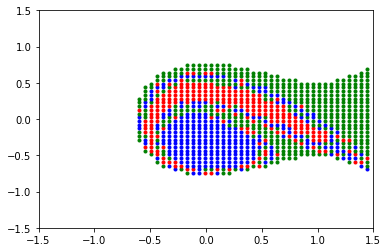

In [31]:
def Fvx(x,y):
    return -x-2*x*y

def Fvy(x,y):
    return -x**2-y+y**2

fig = plt.figure()

yCond=np.linspace(-0.6,1.5,40)
vyCond=np.linspace(-1,1,40)

        
for j in range(0,len(vyCond)-1): #atribuicao de condicoes iniciais
    for k in range(0,len(yCond)-1):
    
        x[0] = 0
        y[0] = yCond[k]
        vy[0] = vyCond[j]
    
        aux = 2*(0.3 - (x[0]**2)*y[0] + (y[0]**3)/3) - x[0]**2 - y[0]**2 - vy[0]**2
        if(aux < 0):
            continue
        
        vx[0]=np.sqrt(aux)
    
        for i in range(0,N-1): #execucao do metodo de Runge-Kutta com coordenadas cartesianas
             
            k1vx[i] = Fvx(x[i],y[i])
            k1vy[i] = Fvy(x[i],y[i])
            k1x[i] = vx[i]
            k1y[i] = vy[i]
         
            k2vx[i] = Fvx(x[i]+k1x[i]*h/2,y[i]+k1y[i]*h/2)
            k2vy[i] = Fvy(x[i]+k1x[i]*h/2,y[i]+k1y[i]*h/2)
            k2x[i] = vx[i]+k1vx[i]*h/2
            k2y[i] = vy[i]+k1vy[i]*h/2
        
            k3vx[i] = Fvx(x[i]+k2x[i]*h/2,y[i]+k2y[i]*h/2)
            k3vy[i] = Fvy(x[i]+k2x[i]*h/2,y[i]+k2y[i]*h/2)
            k3x[i] = vx[i]+k2vx[i]*h/2
            k3y[i] = vy[i]+k2vy[i]*h/2
        
            k4vx[i] = Fvx(x[i]+k3x[i]*h,y[i]+k3y[i]*h)
            k4vy[i] = Fvy(x[i]+k3x[i]*h,y[i]+k3y[i]*h)
            k4x[i] = vx[i]+k3vx[i]*h
            k4y[i] = vy[i]+k3vy[i]*h
        
            vx[i+1] = vx[i] + (h/6)*(k1vx[i] + 2*(k2vx[i] + k3vx[i]) + k4vx[i])
            vy[i+1] = vy[i] + (h/6)*(k1vy[i] + 2*(k2vy[i] + k3vy[i]) + k4vy[i])
            
            if(x[i]>2*np.sqrt(3)/2 or x[i]<-2*np.sqrt(3)/2):
                x[i+1]=x[i]
            else:
                x[i+1] = x[i] + (h/6)*(k1x[i] + 2*(k2x[i] + k3x[i]) + k4x[i])
                
            if(y[i]>2 or y[i]<-1):
                y[i+1]=y[i]
            else:
                y[i+1] = y[i] + (h/6)*(k1y[i] + 2*(k2y[i] + k3y[i]) + k4y[i])
           
            #print(H(vx[i+1],vy[i+1],x[i+1],y[i+1]))
        #print(H(vx[0],vy[0],x[0],y[0]))
        #print(H(vx[i+1],vy[i+1],x[i+1],y[i+1]))
        
        if (x[N-500]>=np.sqrt(3)/2): #(x[i+1]>1.5 and y[i+1]<-0.5):se sair pela direita
            plt.plot(y[0],vy[0],'b.')#azul         plt.plot(x[0],y[0],'b.')
        elif (x[N-500]<=-np.sqrt(3)/2): #(x[i+1]<-1.5 and y[i+1]<-0.5):se sair pela esquerda
            plt.plot(y[0],vy[0],'r.')#vermelho        plt.plot(x[0],y[0],'r.')
        elif (y[N-500]>=1.0): #(y[i+1]>2.0 and abs(x[i+1])<0.27):se sair por cima
            plt.plot(y[0],vy[0],'g.')#verde        plt.plot(x[0],y[0],'g.')
        else: #se nao sair
            plt.plot(y[0],vy[0],'k.')#preto        plt.plot(x[0],y[0],'k.')
        
plt.axis([-1.5,1.5,-1.5,1.5]) #extensao da janela do plot
plt.show() #exibicao do plot

Tempo de Escape

In [5]:
def Fvx(x,y):
    return -x-2*x*y

def Fvy(x,y):
    return -x**2-y+y**2

I_val=[]
vy_val=[]
y_val=[]

yCond=np.linspace(-0.6,1.5,40)
vyCond=np.linspace(-1,1,40)

        
for j in range(0,len(vyCond)-1): #atribuicao de condicoes iniciais
    for k in range(0,len(yCond)-1):
    
        x[0] = 0
        y[0] = yCond[k]
        vy[0] = vyCond[j]
    
        aux = 2*(0.3 - (x[0]**2)*y[0] + (y[0]**3)/3) - x[0]**2 - y[0]**2 - vy[0]**2
        if(aux < 0):
            continue
        
        vx[0]=np.sqrt(aux)
    
        for i in range(0,N-1): #execucao do metodo de Runge-Kutta com coordenadas cartesianas
             
            k1vx[i] = Fvx(x[i],y[i])
            k1vy[i] = Fvy(x[i],y[i])
            k1x[i] = vx[i]
            k1y[i] = vy[i]
         
            k2vx[i] = Fvx(x[i]+k1x[i]*h/2,y[i]+k1y[i]*h/2)
            k2vy[i] = Fvy(x[i]+k1x[i]*h/2,y[i]+k1y[i]*h/2)
            k2x[i] = vx[i]+k1vx[i]*h/2
            k2y[i] = vy[i]+k1vy[i]*h/2
        
            k3vx[i] = Fvx(x[i]+k2x[i]*h/2,y[i]+k2y[i]*h/2)
            k3vy[i] = Fvy(x[i]+k2x[i]*h/2,y[i]+k2y[i]*h/2)
            k3x[i] = vx[i]+k2vx[i]*h/2
            k3y[i] = vy[i]+k2vy[i]*h/2
        
            k4vx[i] = Fvx(x[i]+k3x[i]*h,y[i]+k3y[i]*h)
            k4vy[i] = Fvy(x[i]+k3x[i]*h,y[i]+k3y[i]*h)
            k4x[i] = vx[i]+k3vx[i]*h
            k4y[i] = vy[i]+k3vy[i]*h
        
            vx[i+1] = vx[i] + (h/6)*(k1vx[i] + 2*(k2vx[i] + k3vx[i]) + k4vx[i])
            vy[i+1] = vy[i] + (h/6)*(k1vy[i] + 2*(k2vy[i] + k3vy[i]) + k4vy[i])
            
            if(x[i]>2*np.sqrt(3)/2 or x[i]<-2*np.sqrt(3)/2):
                I_val.append(i)
                vy_val.append(vy[0])
                y_val.append(y[0])
                break
            else:
                x[i+1] = x[i] + (h/6)*(k1x[i] + 2*(k2x[i] + k3x[i]) + k4x[i])
                
            if(y[i]>2 or y[i]<-1):
                I_val.append(i)
                vy_val.append(vy[0])
                y_val.append(y[0])
                break
            else:
                y[i+1] = y[i] + (h/6)*(k1y[i] + 2*(k2y[i] + k3y[i]) + k4y[i])
                
            if(i==N-2):
                I_val.append(i)
                vy_val.append(vy[0])
                y_val.append(y[0])
           
            #print(H(vx[i+1],vy[i+1],x[i+1],y[i+1]))
        #print(H(vx[0],vy[0],x[0],y[0]))
        #print(H(vx[i+1],vy[i+1],x[i+1],y[i+1]))
        
        #if (i<=500): #(x[i+1]>1.5 and y[i+1]<-0.5):se sair pela direita
        #    plt.plot(y[0],vy[0],color=cmap(norm(i)))#azul         plt.plot(x[0],y[0],'b.')
        #elif (i>500 and i<=1000): #(x[i+1]<-1.5 and y[i+1]<-0.5):se sair pela esquerda
        #    plt.plot(y[0],vy[0],color=cmap(norm(i)))#ciano       plt.plot(x[0],y[0],'r.')
        #elif (i>1000 and i<=1500): #(y[i+1]>2.0 and abs(x[i+1])<0.27):se sair por cima
        #    plt.plot(y[0],vy[0],color=cmap(norm(i)))#verde        plt.plot(x[0],y[0],'g.')
        #elif (i>1500 and i<=2000): #(x[i+1]<-1.5 and y[i+1]<-0.5):se sair pela esquerda
        #    plt.plot(y[0],vy[0],color=cmap(norm(i)))#amarelo        plt.plot(x[0],y[0],'r.')
        #elif (i>2000 and i<=2500): #(y[i+1]>2.0 and abs(x[i+1])<0.27):se sair por cima
        #    plt.plot(y[0],vy[0],color=cmap(norm(i)))#rosa       plt.plot(x[0],y[0],'g.')
        #elif (i>2500 and i<=3000): #(y[i+1]>2.0 and abs(x[i+1])<0.27):se sair por cima
        #    plt.plot(y[0],vy[0],color=cmap(norm(i)))#vermelho        plt.plot(x[0],y[0],'g.')
        #else: #se nao sair
        #    plt.plot(y[0],vy[0],color=cmap(norm(i)))#preto        plt.plot(x[0],y[0],'k.')
        

In [15]:
print(len(vy_val),len(y_val),len(I_val))
print(I_val,y_val)

164 164 164
[3172, 448, 1160, 7902, 305, 9830, 2708, 9149, 342, 250, 7204, 746, 1972, 6626, 1371, 397, 270, 217, 3812, 781, 661, 823, 2622, 2105, 1117, 500, 292, 230, 192, 3626, 3746, 4852, 6810, 8796, 2945, 318, 244, 203, 173, 3963, 2586, 5382, 5742, 1432, 347, 259, 213, 182, 158, 3363, 5644, 6588, 1386, 382, 275, 224, 191, 165, 145, 8388, 4033, 4249, 1367, 1289, 2581, 425, 290, 234, 199, 173, 152, 134, 8941, 481, 305, 245, 207, 180, 158, 140, 125, 5469, 4201, 563, 320, 254, 215, 186, 164, 146, 130, 116, 2808, 5565, 4240, 8745, 742, 333, 263, 222, 193, 170, 151, 135, 121, 109, 4050, 7217, 8621, 8198, 198, 175, 156, 140, 126, 113, 102, 9833, 4457, 161, 145, 130, 118, 106, 96, 6699, 2940, 709, 135, 122, 110, 100, 90, 7945, 8911, 1097, 943, 937, 949, 1000, 557, 114, 104, 94, 85, 4070, 8534, 6853, 98, 89, 81, 9655, 85, 77, 908, 3232, 3198, 634, 80, 73, 5091, 69, 7714, 2023] [-1.0024702701455863, 2.007805375690526, 2.005861781927048, -0.9805669583711261, 2.0124161181081996, -0.959346573486

In [6]:
sc = plt.scatter(y_val,vy_val,c=I_val, cmap=plt.cm.get_cmap('winter'))

plt.colorbar(sc)
        
#plt.axis([-1.5,1.5,-1.5,1.5]) #extensao da janela do plot
plt.show() #exibicao do plot